In [36]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

n_state = 10
n_action = 5
n_samples = 100

discount = 0.5

# TODO USE ACTUAL MAPPED INSTANCES INSTEAD OF THESE RANDOMLY GENERATED VECTORS
actions = np.random.binomial(n_action-1,[1/n_action],n_samples)
instances = np.arange(n_state*n_samples).reshape(n_samples,n_state).astype(float)
transitions = np.arange(n_state*n_samples).reshape(n_samples,n_state).astype(float)
rewards = -np.ones((n_samples))

n_layer1 = 15
n_layer2 = 15
n_layer3 = 15

# TODO STANDARDIZE INPUTS AND OUTPUTS

initializer = tf.truncated_normal_initializer
ini_mean = 0
ini_std = 1
activation = tf.nn.relu

def weight_matrix(n_from,n_to):
    return tf.Variable(tf.truncated_normal(
        shape=(n_from,n_to)
        ,mean=ini_mean
        ,stddev=ini_std/(n_from+n_to)
        ,dtype=tf.float32))

def bias_matrix(n_to):
    return tf.zeros(shape=(1,n_to),dtype=tf.float32)


q_input = tf.placeholder(name='q_input', shape=(None,n_state),dtype=tf.float32)

q_w1 = weight_matrix(n_state,n_layer1)
q_b1 = bias_matrix(n_layer1)
q_layer1 = activation(tf.matmul(q_input,q_w1) + q_b1)
q_w2 = weight_matrix(n_layer1,n_layer2)
q_b2 = bias_matrix(n_layer2)
q_layer2 = activation(tf.matmul(q_layer1,q_w2)+ q_b2)
q_w3 = weight_matrix(n_layer2,n_layer3)
q_b3 = bias_matrix(n_layer3)
q_layer3 = activation(tf.matmul(q_layer2,q_w3)+ q_b3)
q_wout = weight_matrix(n_layer3,n_action)

q_bpred = bias_matrix(n_action) 
q_pred = tf.matmul(q_layer3,q_wout) + q_bpred

q_output = tf.placeholder(name='q_output',shape=(None,n_action),dtype=tf.float32)
loss = tf.nn.l2_loss(q_output - q_pred)

opt = tf.train.MomentumOptimizer(
    learning_rate=0.000001,
    momentum=0.7)

opt_op = opt.minimize(loss, var_list = [q_w1,q_w2,q_w3,q_wout])

builder = tf.saved_model.builder.SavedModelBuilder("./tmp/model.ckpt")

loss: 46.018577575683594: 100%|██████████| 5/5 [00:00<00:00, 58.23it/s]

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: b'./tmp3/model.ckpt/saved_model.pb'
b'./tmp3/model.ckpt/saved_model.pb'
done - model saved at ./tmp/model.ckpt


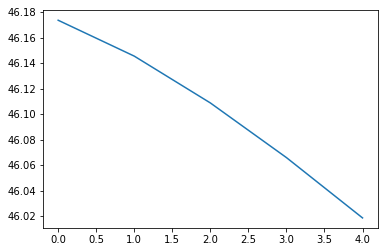

In [42]:
n_epochs = 5

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
pbar = tqdm(range(n_epochs))
_losses = []
for _ in pbar:

    bellman_trans_q = np.max(sess.run(q_pred, feed_dict={q_input:transitions}),axis=1)

    ground_truth = sess.run(q_pred, feed_dict={q_input:instances})
    ground_truth[list(range(n_samples)),actions] = rewards + discount*bellman_trans_q

    sess.run(opt_op,feed_dict={q_input:instances, q_output:ground_truth})
    _loss = sess.run(loss,feed_dict={q_input:instances, q_output:ground_truth})
    _losses.append(_loss)
    pbar.set_description('loss: {}'.format(_loss))
    
    ### TODO : Save model w/trained variables for use in target task
    
builder.add_meta_graph_and_variables(sess,
                                     ['q_learning']
                                        
                                       )

print(builder.save())

print('done - model saved at', save_path)

sess.close()
    
plt.plot(list(range(n_epochs)),_losses)
plt.show()

In [17]:
rewards + discount*bellman_trans_q

array([-0.99908656, -0.99699093, -0.99488709, -0.99279086, -0.99070133,
       -0.98860738, -0.98651342, -0.98441946, -0.98232551, -0.98023154,
       -0.97813759, -0.97604364, -0.97394967, -0.97185571, -0.96976176,
       -0.9676678 , -0.96557384, -0.96347989, -0.96138594, -0.95929197,
       -0.95719801, -0.95510406, -0.9530101 , -0.95091614, -0.94882219,
       -0.94672824, -0.94463426, -0.94254033, -0.94044635, -0.93835241,
       -0.93625844, -0.93416446, -0.93207053, -0.92997657, -0.92788262,
       -0.92578866, -0.92369469, -0.92160076, -0.91950679, -0.91741284,
       -0.91531888, -0.9132249 , -0.91113097, -0.909037  , -0.90694305,
       -0.90484908, -0.90275512, -0.90066117, -0.89856721, -0.89647329,
       -0.89437939, -0.89228547, -0.89019156, -0.88809758, -0.88600367,
       -0.88390972, -0.88181585, -0.87972194, -0.87762798, -0.87553407,
       -0.87344015, -0.87134624, -0.86925229, -0.86715835, -0.86506444,
       -0.8629705 , -0.86087659, -0.8587826 , -0.85668871, -0.85

In [18]:
bellman_trans_q

array([ 0.00182689,  0.00601815,  0.01022583,  0.01441829,  0.01859733,
        0.02278524,  0.02697316,  0.03116107,  0.03534898,  0.03953691,
        0.04372481,  0.04791272,  0.05210067,  0.05628857,  0.06047648,
        0.06466441,  0.06885231,  0.07304022,  0.07722811,  0.08141606,
        0.08560397,  0.08979187,  0.09397981,  0.09816772,  0.10235561,
        0.10654353,  0.11073148,  0.11491934,  0.11910729,  0.12329517,
        0.12748311,  0.13167107,  0.13585894,  0.14004686,  0.14423476,
        0.14842267,  0.15261061,  0.15679848,  0.16098642,  0.16517432,
        0.16936225,  0.1735502 ,  0.17773806,  0.181926  ,  0.18611389,
        0.19030184,  0.19448976,  0.19867766,  0.20286557,  0.20705342,
        0.21124122,  0.21542905,  0.21961688,  0.22380483,  0.22799267,
        0.23218057,  0.2363683 ,  0.24055612,  0.24474403,  0.24893187,
        0.25311971,  0.25730753,  0.26149541,  0.26568329,  0.26987112,
        0.274059  ,  0.27824682,  0.28243479,  0.28662258,  0.29